In [1]:
from dask.distributed import Client

In [2]:
client = Client(processes=False, memory_limit='1.2GB')

In [3]:
client

Client Scheduler: inproc://10.32.14.5/387/1 Dashboard: /user/andersy005/proxy/8787/status,Cluster Workers: 1 Cores: 4 Memory: 1.20 GB


In [4]:
import dask

In [5]:
df = dask.datasets.timeseries(partition_freq='15D')

In [6]:
df.npartitions

2

In [7]:
df['z'] = df.x + df.y

In [8]:
df.head()

,id,name,x,y,z
timestamp,,,,,
2000-01-01 00:00:00,995,George,-0.719339,-0.047230,-0.766569
2000-01-01 00:00:01,991,Laura,-0.389237,-0.442584,-0.831820
2000-01-01 00:00:02,1002,Ray,0.342639,-0.152658,0.189980
2000-01-01 00:00:03,1064,Oliver,0.557524,0.984082,1.541605
2000-01-01 00:00:04,1004,Bob,-0.666439,0.764427,0.097987


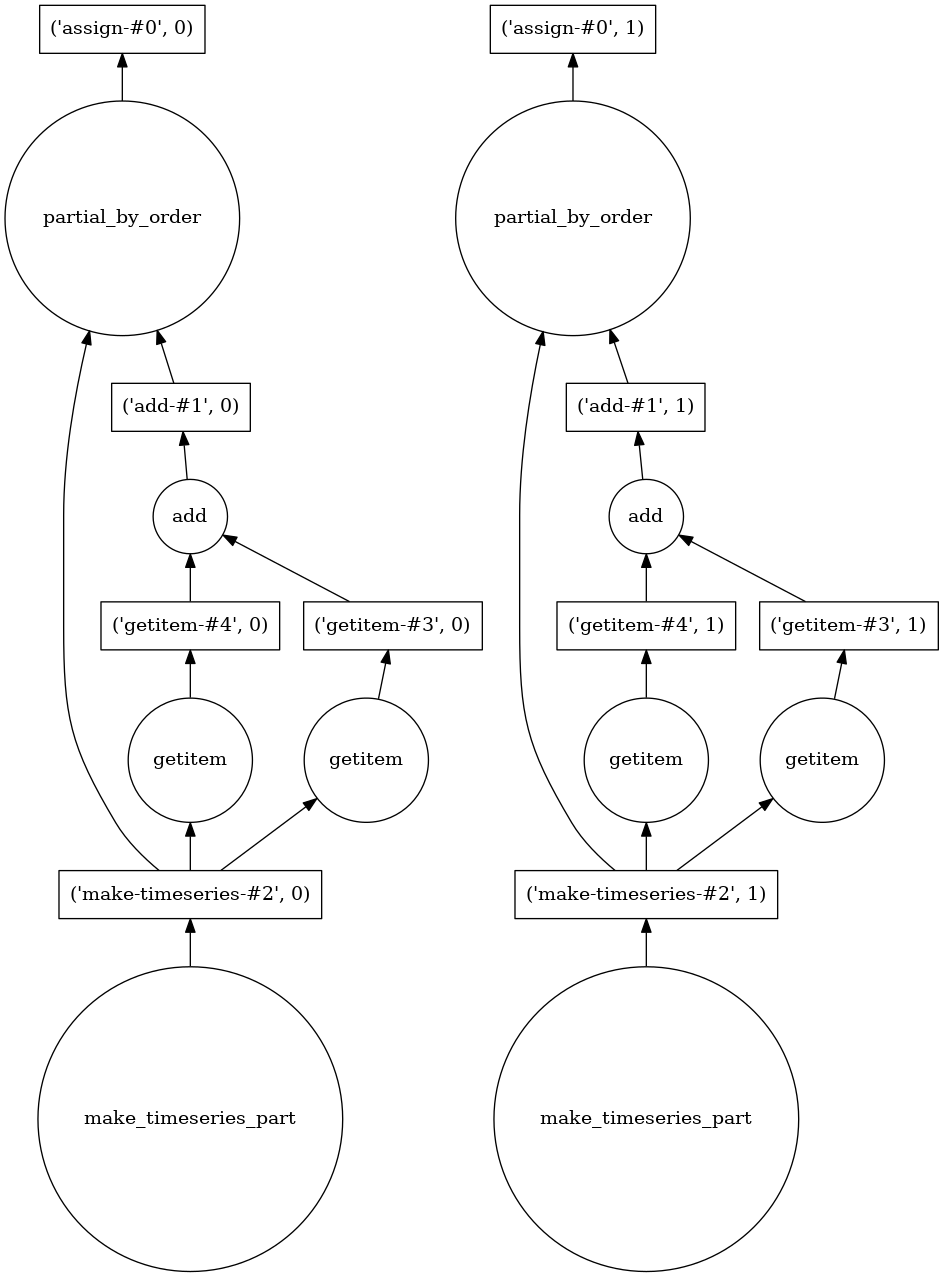

In [9]:
df.visualize('dask-pre-persist', format='png')

In [10]:
df = df.persist() 

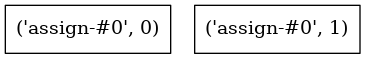

In [11]:
df.visualize('dask-post-persist', format='png')

In [12]:
df['tmp'] = df.x + df.y + df.z

In [13]:
df.head()

,id,name,x,y,z,tmp
timestamp,,,,,,
2000-01-01 00:00:00,995,George,-0.719339,-0.047230,-0.766569,-1.533138
2000-01-01 00:00:01,991,Laura,-0.389237,-0.442584,-0.831820,-1.663641
2000-01-01 00:00:02,1002,Ray,0.342639,-0.152658,0.189980,0.379960
2000-01-01 00:00:03,1064,Oliver,0.557524,0.984082,1.541605,3.083211
2000-01-01 00:00:04,1004,Bob,-0.666439,0.764427,0.097987,0.195975


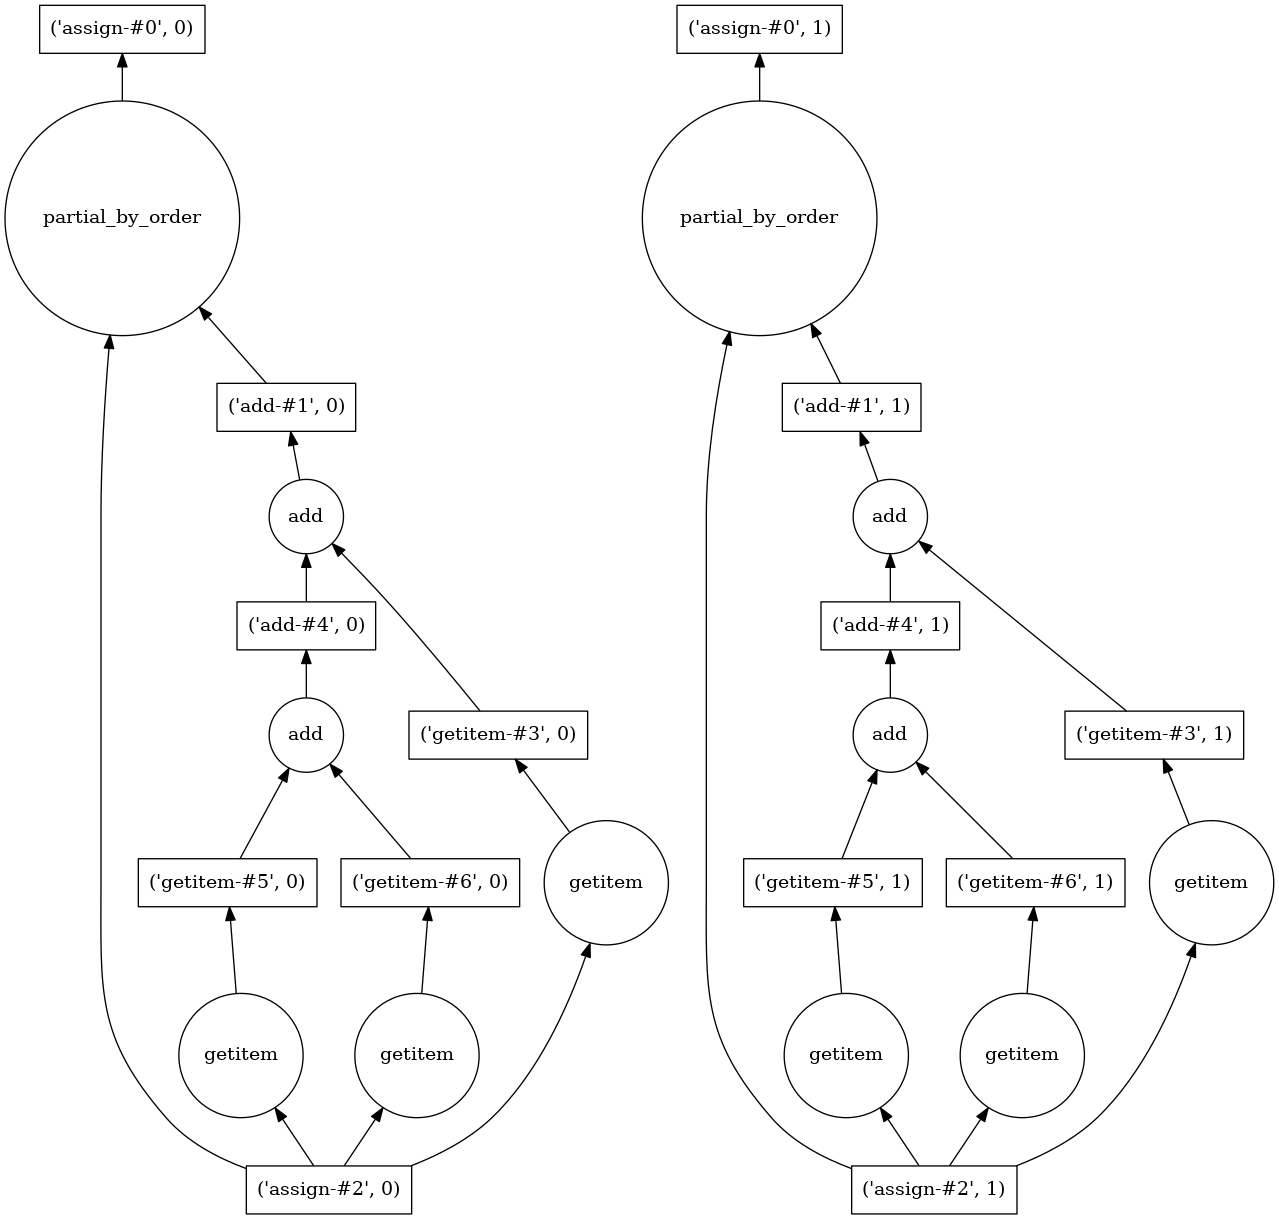

In [14]:
df.visualize('dask-post-persist-2', format='png')